<a href="https://colab.research.google.com/github/CoChar02/ISLP-Sols/blob/main/ISLP_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 5.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=2de2f22a380307f8983c884ce4c60a7f98a951951200df6ad8a2c81c579d766f
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting 

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize,
poly)

In [ ]:
Boston = load_data("Boston")
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
'lstat': Boston['lstat']})
X[:4]


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4


In [ ]:
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()

In [ ]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [ ]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [ ]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           5.08e-88
Time:                        13:28:30   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [ ]:
new_predictions = results.get_prediction(newX);
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [ ]:
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [ ]:
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

In [ ]:
def abline(ax, b, m):
  "Add a line with slope m and intercept b to ax"
  xlim = ax.get_xlim()
  ylim = [m * xlim[0] + b, m * xlim[1] + b]
  ax.plot(xlim, ylim)

In [ ]:
def abline(ax, b, m, *args, **kwargs):
  "Add a line with slope m and intercept b to ax"
  xlim = ax.get_xlim()
  ylim = [m * xlim[0] + b, m * xlim[1] + b]
  ax.plot(xlim, ylim, *args, **kwargs)

<ipython-input-31-f2b586c47242>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
<ipython-input-31-f2b586c47242>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


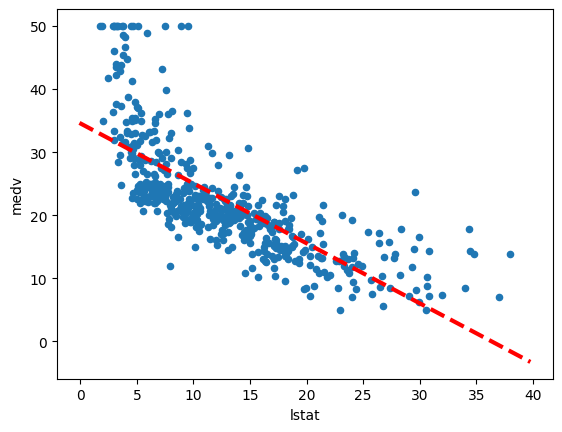

In [ ]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax,
  results.params[0],
  results.params[1],
  'r--',
  linewidth=3)

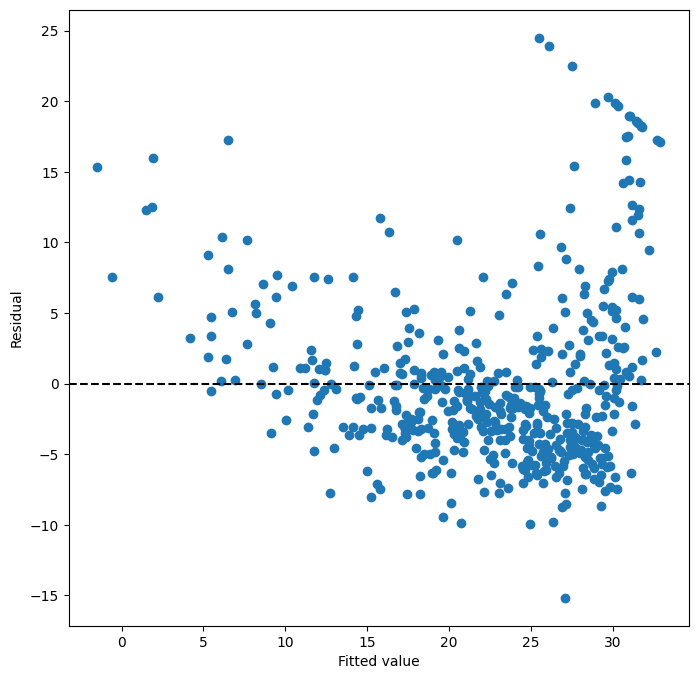

In [ ]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

374

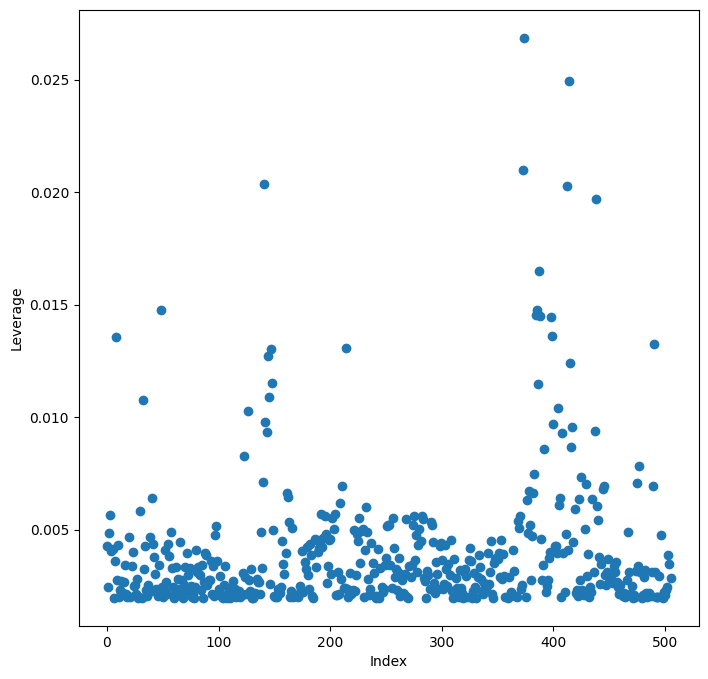

In [ ]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [ ]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [ ]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [ ]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [ ]:
minus_age = Boston.columns.drop(['medv', 'age'])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


In [ ]:
vals = [VIF(X, i)
        for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
                    index=X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [ ]:
X = MS(['lstat',
'age',
('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


In [ ]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [ ]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


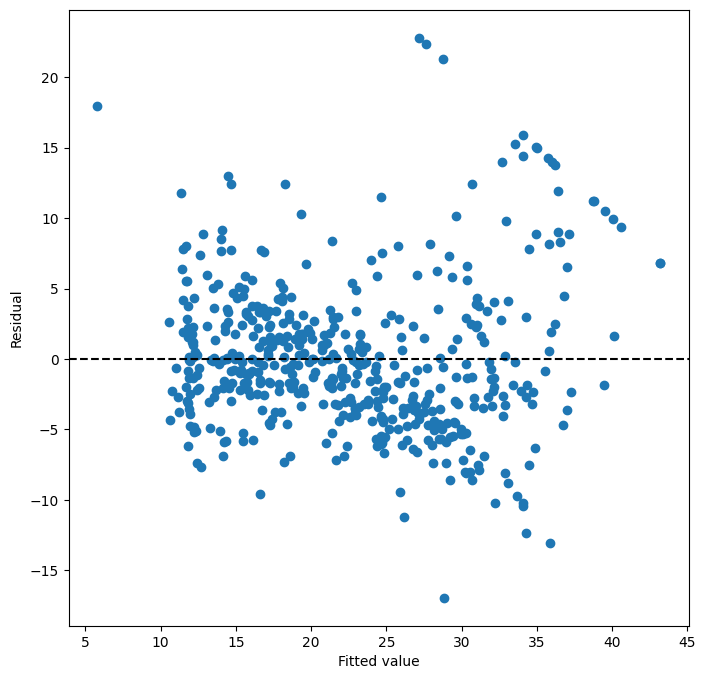

In [ ]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues , results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

In [ ]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [ ]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'),
('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
results4 = model.fit()
summarize(results4)

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


#Conceptual
##1
Describe the null hypotheses to which the p-values given in Table 3.4
correspond. Explain what conclusions you can draw based on these
p-values. Your explanation should be phrased in terms of sales, TV,
radio, and newspaper, rather than in terms of the coefcients of the
linear model.

$(TV) H_0 : \beta_0 = 0, (Radio) H_0: \beta_1 = 0, (Newspaper) H_0: \beta_2 = 0$

The p-values for tv and radio in the table are significant and the null hypothesis can be rejected, showing that there is a strong correlation between spending on TV and Radio advertising and sales. However the p-value for Newspaper is not significant and the null hypothesis can not be rejected, showing that newspaper advertising does not significantly increase sales in the presence of tv and radio advertising.

##2
Carefully explain the diferences between the KNN classifer and KNN
regression methods.





KNN Classifier and KNN regression are both uses of the KNN algorithm;

The KNN classifier is used in classification problems, it is a qualatative response and uses the K nearest points to the given input variable. The model will estimate the probability that the input variable belongs to a certain class based on the fraction of the class amongst the selected K neighbours, the input variable is then classified as belonging to the most probable class.

KNN regression is used in regression problems, it is a quantative response and uses the K nearest points to a given input variable. The model will estimate the response value by taking the average of the nearest K points around the input variable.

##3  
Suppose we have a data set with fve predictors, X1 = GPA, X2 =
IQ, X3 = Level (1 for College and 0 for High School), X4 = Interaction between GPA and IQ, and X5 = Interaction between GPA and
Level. The response is starting salary after graduation (in thousands
of dollars). Suppose we use least squares to ft the model, and get
$\hatβ_0 = 50, \hatβ_1 = 20, \hatβ_2 = 0.07, \hatβ_3 = 35, \hatβ_4 = 0.01, \hatβ_5 = -10.$

(a) Which answer is correct, and why?


1. For a fxed value of IQ and GPA, high school graduates earn
  more, on average, than college graduates.
2. For a fxed value of IQ and GPA, college graduates earn
  more, on average, than high school graduates.
3. For a fxed value of IQ and GPA, high school graduates earn
  more, on average, than college graduates provided that the
  GPA is high enough.
4. For a fxed value of IQ and GPA, college graduates earn
  more, on average, than high school graduates provided that
  the GPA is high enough.


(b) Predict the salary of a college graduate with IQ of 110 and a
GPA of 4.0.

(c) True or false: Since the coefcient for the GPA/IQ interaction
term is very small, there is very little evidence of an interaction
effect. Justify your answer.

A. III is true when high school graduates have a GPA of > 3.5 they earn more, on average, than college graduates

B. $y=50+20x_1+0.07x_2+35x_3+0.01x_1x_2+\left(-10\right)x_1x_3,\\
x_1=4,\:x_2=110,\:x_3=1 \\
y = 137.1k$

C. We cannot conclude whether or not there is evidence of an interaction effect based solely on the coefficient presented, to do so we would need to conduct a hypothesis test with $H_0 : β_4 = 0$ and then compute the relevant t or f statistics inorder to accept or reject the null hypothesis

##4
I collect a set of data (n = 100 observations) containing a single
predictor and a quantitative response. I then ft a linear regression
model to the data, as well as a separate cubic regression, i.e. $Y =
β_0 + β_1X + β_2X^2 + β_3X^3 + ε"$.

(a) Suppose that the true relationship between X and Y is linear,
i.e. $Y = β0 + β1X + ε"$.

Consider the training residual sum of
squares (RSS) for the linear regression, and also the training
RSS for the cubic regression. Would we expect one to be lower
than the other, would we expect them to be the same, or is there
not enough information to tell? Justify your answer.


(b) Answer (a) using test rather than training RSS.

(c) Suppose that the true relationship between X and Y is not linear,
but we don’t know how far it is from linear. Consider the training
RSS for the linear regression, and also the training RSS for the
cubic regression. Would we expect one to be lower than the
other, would we expect them to be the same, or is there not
enough information to tell? Justify your answer.

(d) Answer (c) using test rather than training RSS.

A. The cubic regression will have a better fit to the training data because of its lower bias, it can better fit to the training data resulting in a lower RSS

B. Conversely, the cubic regression will have a much worse fit to the testing data, high variance. This is due to the true relationship being linear; we can see that the linear regression will still have a low bias and a much lower variance as it does not overfit as much to the data like the cubic regression would.

C. The cubic regression would again have a lower RSS due to being able to fit better to the training data, the model is more flexible and has a lower bias than the linear model.

D. There is not enough information to tell, while we know the model is non-linear, we do not know how non-linear the model is. If it is close to a linear relationship, the linear regression may still have a low bias and low variance, outperforming the cubic regression, on the other hand if the relationshop is very non-linear the linear regression will have both high bias and high variance; here we would expect the cubic regression to outperform it.

##5
Consider the ftted values that result from performing linear regression without an intercept. In this setting, the ith ftted value takes
the form
$y_i = x_i\hatβ,where\\
\hatβ = (∑_{i=1}^n x_{i}y_{i}) / (∑_{i'=1}^n x_{i'}^2)$\
Show that we can write
$y_i = ∑_{i = 1}^n a_iy_i$


What is $a_i$?

$\hat y_i = x_i\hatβ = x_i(∑_{i'=1}^n x_{i'}y_{i'}) / (∑_{i''=1}^n x_{i''}^2) = ∑_{i'= 1}^n (\frac{x_ix_i'}{\sum_{i''}^nx_{i''}^2}y_i')$


$a_i = \frac{x_ix_i'}{\sum_{i''}^nx_{i''}^2}$

##6
Using (3.4), argue that in the case of simple linear regression, the
least squares line always passes through the point ($\bar x, \bar y$).

$\hat y = \hat β_0 + \hat β_1x$

$\hat β_0 = \bar y - β_1\bar x$

Since we want to know if we pass through $\bar x, \bar y$ we can substitute these into the first equation, giving

$\bar y = \hat β_0 + \bar β_1x$

we can then substitute the second equation into this

$\bar y = \bar y - β_1\bar x + \bar β_1x$

This is always true, so we can say that we pass through $\bar x, \bar y$

##7
It is claimed in the text that in the case of simple linear regression
of Y onto X, the $R^2$ statistic (3.17) is equal to the square of the
correlation between X and Y (3.18). Prove that this is the case. For
simplicity, you may assume that $\bar x = \bar y = 0$.

When $\bar X,\ and\ \bar Y$ are == 0$, Cor(X,Y) = \frac{∑_ix_iy_i}{\sqrt{\sum_ix_i^2 } \sqrt{\sum_iy_i^2 }}$

$\hat β_0 = \bar y - β_1\bar x = 0$

$\hat β_1 = \frac{\sum_ix_iy_i}{\sum_ix_i^2}$

$R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum_i(y_i-\hat y_i)^2}{\sum_i(y_i-\bar y)^2} = 1 - \frac{\sum_i(y_i-\hat β_1x_i)^2}{\sum_i(y_i)^2}$

Expand the top bracket then simplify and show that its equal to corr^2

#Practical

##8
This question involves the use of simple linear regression on the Auto
data set.

  (a) Use the sm.OLS() function to perform a simple linear regression
  with mpg as the response and horsepower as the predictor. Use
  the summarize() function to print the results. Comment on the
  output.

For example:
i. Is there a relationship between the predictor and the response?
ii. How strong is the relationship between the predictor and
the response?
iii. Is the relationship between the predictor and the response
positive or negative?
iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confdence and prediction
intervals?

(b) Plot the response and the predictor in a new set of axes ax. Use
the ax.axline() method or the abline() function defned in the
lab to display the least squares regression line.

(c) Produce some of diagnostic plots of the least squares regression
ft as described in the lab. Comment on any problems you see
with the ft.


In [ ]:
pip install ISLP

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

df = pd.read_csv('/usr/local/lib/python3.10/dist-packages/ISLP/data/Auto.csv')

In [ ]:
df.shape

(392, 9)

In [ ]:
#create input and response
x_train = df['horsepower']
y_train = df['mpg']

x_train.head()

,horsepower
0,130
1,165
2,150
3,150
4,140


In [ ]:
x_train.isnull().sum()
#No Null values!

0

In [ ]:
y_train.unique()
y_train.isnull().sum()

0

In [ ]:
X = pd.DataFrame({'intercept': np.ones(x_train.shape[0]),'horsepower': x_train})
X[:4]

,intercept,horsepower
0,1.0,130
1,1.0,165
2,1.0,150
3,1.0,150


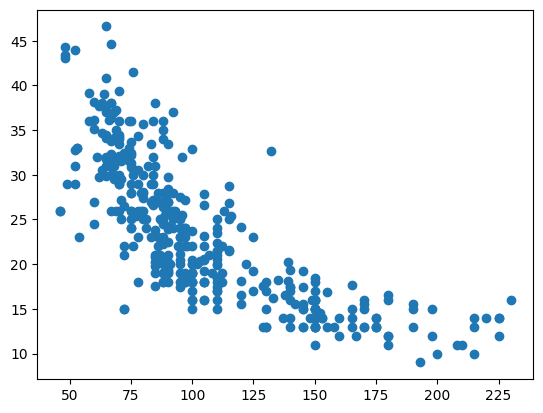

In [ ]:
plt.scatter(X['horsepower'], y_train)

In [ ]:
#create model
model = sm.OLS(y_train, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           7.03e-81
Time:                        15:06:30   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.0

###a
####i
We can confidently reject the null hypothesis as the F-statistic is very high compared to the p-value which is very close to 0

####ii
With an $R^2$ value of 0.606 we can say that roughly 60% of the variance in mpg could be explained by the horsepower

####iii
With a coefficient of -0.1578 we see a negative relationship between predictor and response variables

####iv


In [ ]:
prediction = results.get_prediction((1,98))
pred_sum = prediction.summary_frame(alpha=0.05)

pred_sum

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


Confidence interval - fit: 24.467077, lower: 23.973079, upper: 24.961075

Prediction interval - fit: 24.467077, lower: 14.809396, upper: 34.124758

###b


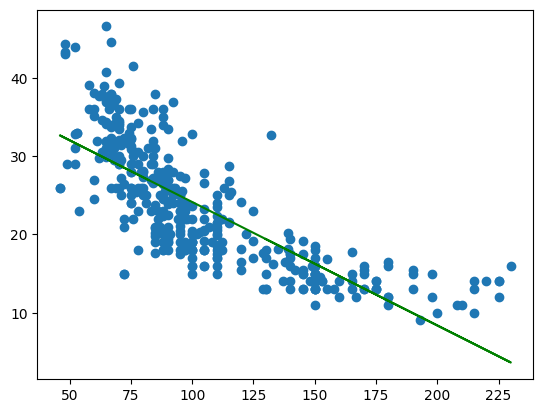

In [ ]:
plt.subplots(1,1)
plt.scatter(x_train, y_train)
plt.plot(x_train, results.fittedvalues, color = 'green')

###c

In [ ]:
import seaborn as sns
fittedY = results.fittedvalues
residualY = results.resid
studentizedResids = results.get_influence().resid_studentized_internal
leverage = results.get_influence().hat_matrix_diag

NameError: name 'results' is not defined

<Axes: xlabel='horsepower', ylabel='mpg'>

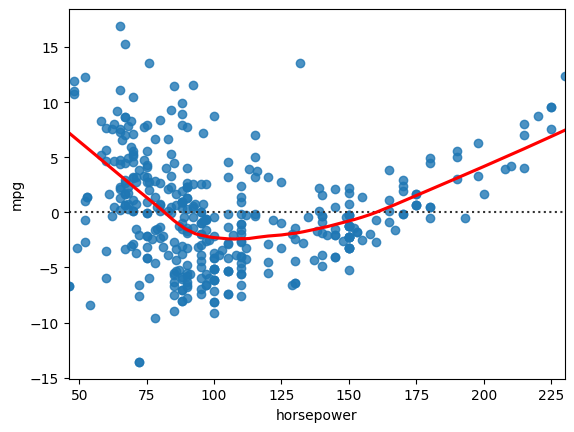

In [ ]:
sns.residplot(data=df, x="horsepower", y="mpg", lowess=True, line_kws=dict(color="r"))

From the above graph we can infer some things about our dataset:

Heteroscedasticity is present, we can see a funnel-like shape around our line of best fit

The true relationship of our data is likely not linear, as evidenced by the curved shape of our residuals

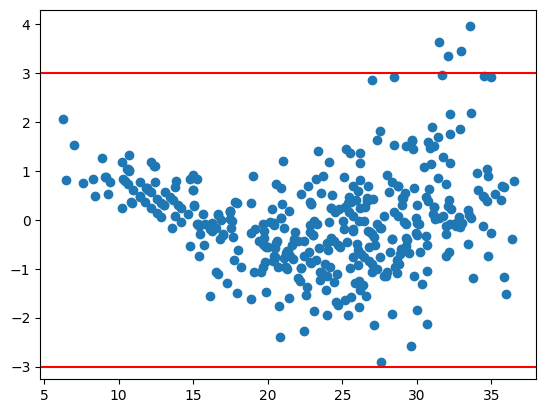

In [ ]:
plt.scatter(fittedY, studentizedResids)
plt.axhline(y=3, color= 'red')
plt.axhline(y=-3, color= 'red')

Here we can identify two possible outliers which have a studentized residual > 3 in absolute value.

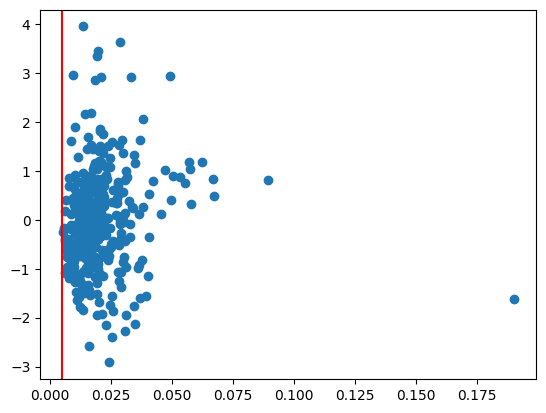

In [ ]:
plt.scatter(leverage, studentizedResids)
plt.axvline(x=2/len(leverage), color = 'red')

Points passed the red line (p+1/n) could be said to have high leverage

##9

This question involves the use of multiple linear regression on the
Auto data set.
(a) Produce a scatterplot matrix which includes all of the variables
in the data set.

(b) Compute the matrix of correlations between the variables using
the DataFrame.corr() method. .corr()

(c) Use the sm.OLS() function to perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the summarize() function to print the results.
Comment on the output. For instance:

i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to
answer this question.

ii. Which predictors appear to have a statistically signifcant
relationship to the response?

iii. What does the coefcient for the year variable suggest?

(d) Produce some of diagnostic plots of the linear regression ft as
described in the lab. Comment on any problems you see with the
ft. Do the residual plots suggest any unusually large outliers?
Does the leverage plot identify any observations with unusually
high leverage?

(e) Fit some models with interactions as described in the lab. Do
any interactions appear to be statistically signifcant?

(f) Try a few diferent transformations of the variables, such as
log(X),
√X, X^2. Comment on your fndings.

####a

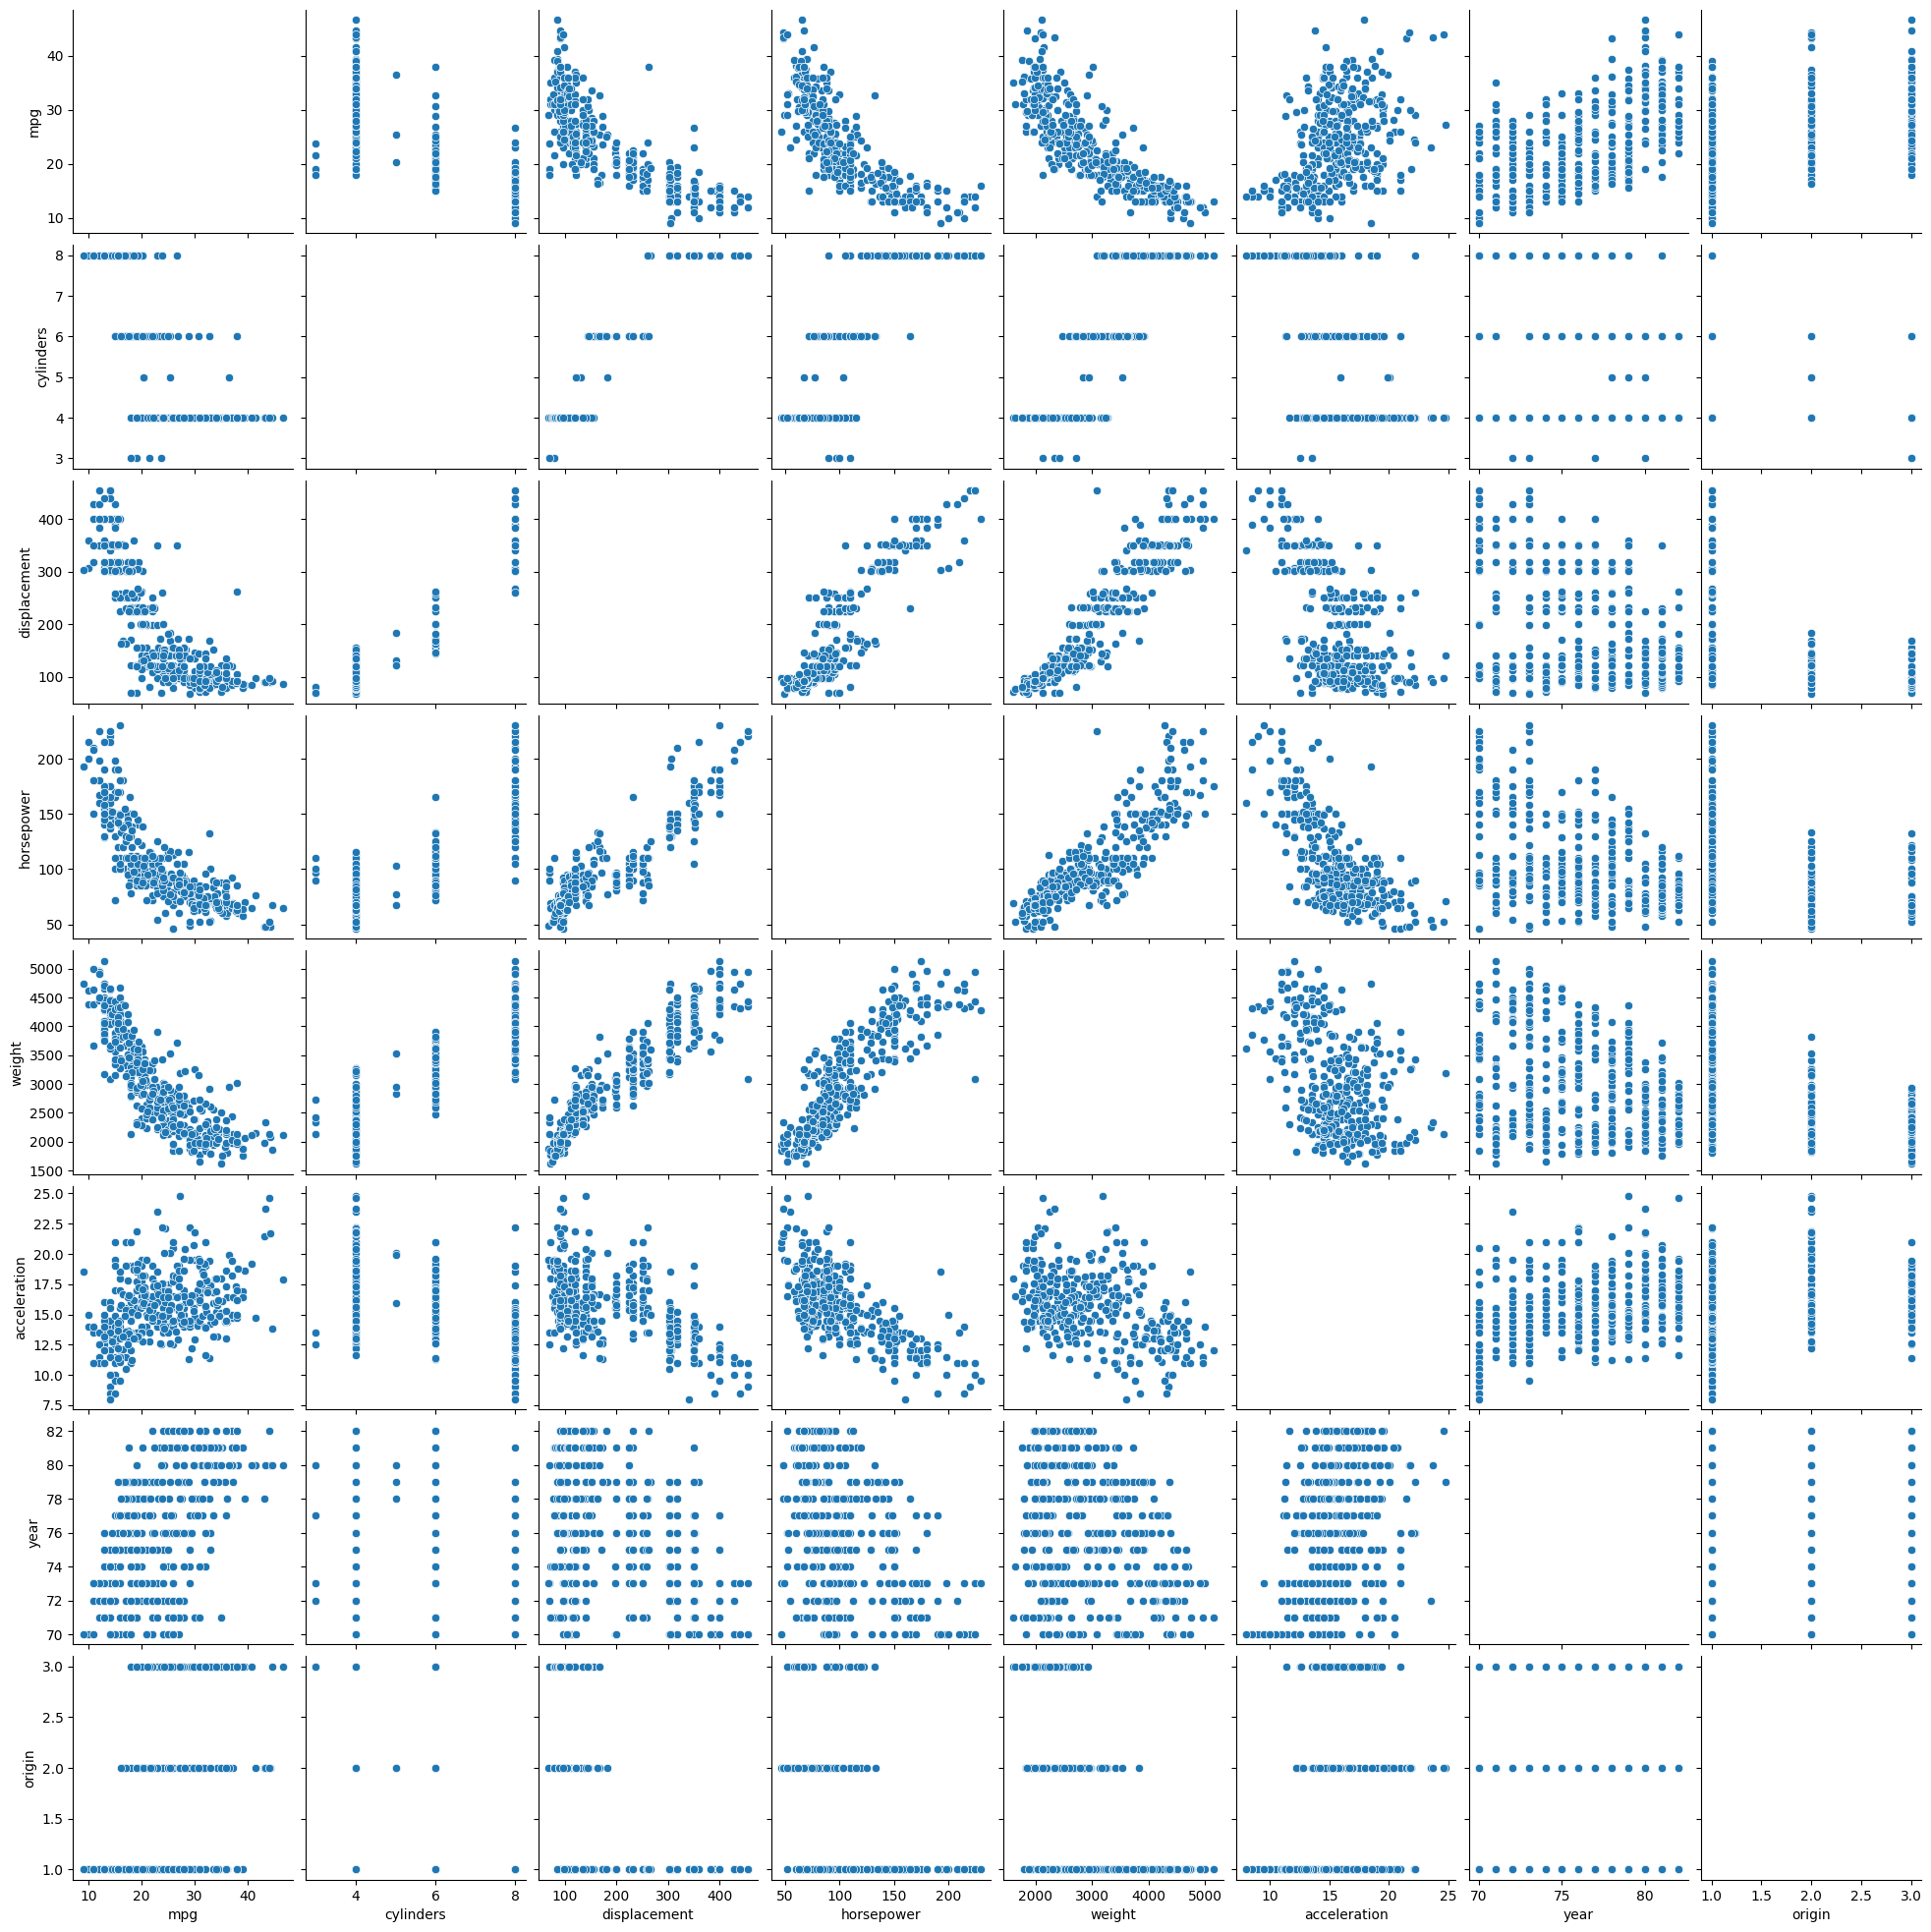

In [ ]:
df = pd.read_csv('/usr/local/lib/python3.10/dist-packages/ISLP/data/Auto.csv')
df.isnull().sum()
sns.pairplot(df, diag_kind = 'None')

####b

In [ ]:
df.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


####c

In [ ]:
model = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          2.04e-139
Time:                        21:01:22   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#####i

We can confidently reject the null hypothesis as the p-value of this regression is extremely low at $2.04 x 10^-139$ and an F-statistic of over 250

#####ii
We can see which predictors are statistically significant based on the p-values supplied by the summary: Weight, year, origin, and displacement are stastically significant whereas cylinders, horsepower, and acceleration are not

#####iii
The coefficient of year suggests that for each unit increase in year, the mpg would increase by roughly 0.75

####d

In [ ]:
fittedY = results.fittedvalues
resids = results.resid
absResids = np.abs(results.resid)
studentizedResids = results.get_influence().resid_studentized_internal
sqrtAbsStudentisedResids = np.sqrt(np.abs(studentizedResids))
leverage = results.get_influence().hat_matrix_diag
cooksDistance = results.get_influence().cooks_distance[0]

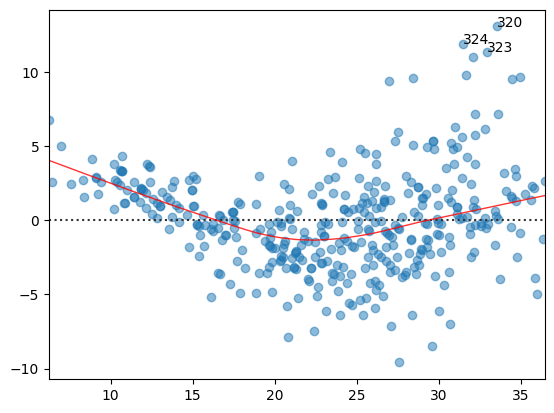

In [ ]:
sns.residplot(data=df, x = fittedY, y = resids, lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

abs_resid = absResids.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]
plot_lm_1 = plt.figure(1)
for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, xy=(fittedY[i], resids[i]));

<Axes: >

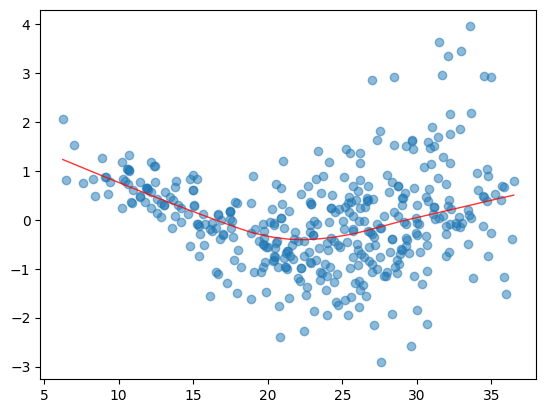

In [ ]:
plt.scatter(fittedY, studentizedResids, alpha=0.5)
sns.regplot(x=fittedY, y = studentizedResids, scatter = False, lowess = True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

In [ ]:
srDF = pd.DataFrame(studentizedResids)
srDF.drop(srDF[srDF[0] < 3].index, inplace=True)
srDF

,0
242,3.344681
320,3.951894
323,3.444885
324,3.631071


Some observations may be outliers, but not overly so

In [ ]:
HighlyInfluencial = cooksDistance > 0.5
HighlyInfluencial.sum()

0

No Highly Influencial observations

<Axes: >

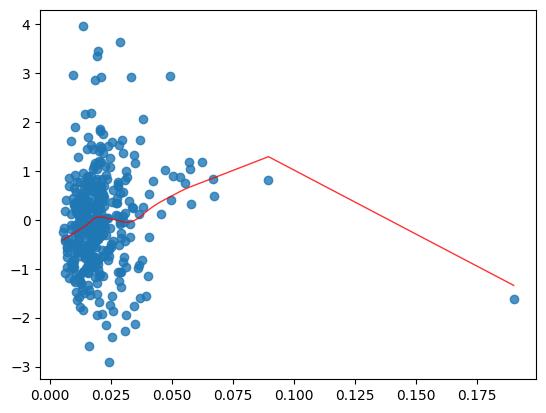

In [ ]:
sns.regplot(x = leverage, y = studentizedResids,
            scatter=True,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})


In [ ]:
levDF = pd.DataFrame(leverage)
levDF.drop(levDF[levDF[0] < ((len(df.columns))/len(leverage))].index, inplace=True)
levDF

,0
0,0.023231
4,0.025870
5,0.034446
6,0.057328
7,0.046996
...,...
381,0.033265
384,0.027938
385,0.025316
388,0.049172


There is an influencial observation but it falls within cooks distance and is unlikely to be statistically significant

In [ ]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']].values # Get values from columns as a numpy array
vals = [VIF(X, i) for i in range(X.shape[1])] # Iterate over the number of columns

vif = pd.DataFrame({'vif':vals}, index=df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']].columns)
vif

,vif
cylinders,117.708547
displacement,96.909762
horsepower,67.072154
weight,139.454162
acceleration,69.699769
year,115.794614
origin,8.469942


####e

In [ ]:
model2 = smf.ols('mpg ~ weight*year + origin + displacement', df)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     404.4
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          5.53e-151
Time:                        22:02:52   Log-Likelihood:                -1002.4
No. Observations:                 392   AIC:                             2017.
Df Residuals:                     386   BIC:                             2041.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -107.6004     12.904     -8.339      0.000    -132.971     -82.229
weight           0.0260      0.005      5.722      0.000       0.017       0.035
year             1.9624      0.172     11.436      0.000       1.625       2.300
weight:year     -0.0004   5.97e-05     -7.214      0.000      -0.001      -0.000
origin           0.9116      0.255      3.579      0.000       0.411       1.412
displacement    -0.0004      0.005     -0.088      0.930      -0.009       0.009
==============================================================================
Omnibus:                       43.792   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.759
Skew:                           0.619   Prob(JB):                     3.23e-20
Kurtosis:                       4.991   Cond. No.                     1.90e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model3 = smf.ols('mpg ~ displacement + horsepower + origin + weight + year \
               + displacement:horsepower + displacement:origin + displacement:weight + displacement:year \
               + horsepower:origin + horsepower:weight + horsepower:year + origin:weight + origin:year + weight:year', df)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          1.09e-162
Time:                        22:06:47   Log-Likelihood:                -945.49
No. Observations:                 392   AIC:                             1923.
Df Residuals:                     376   BIC:                             1987.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -51.3746     26.175     -1.963      0.050    -102.843       0.093
displacement               -0.1818      0.120     -1.521      0.129      -0.417       0.053
horsepower                  0.9485      0.232      4.089      0.000       0.492       1.405
origin                     -3.0637      5.496     -0.557      0.578     -13.871       7.744
weight                     -0.0174      0.016     -1.115      0.265      -0.048       0.013
year                        1.3975      0.328      4.267      0.000       0.754       2.042
displacement:horsepower    -0.0001      0.000     -0.815      0.416      -0.000       0.000
displacement:origin         0.0282      0.013      2.172      0.030       0.003       0.054
displacement:weight      2.792e-05   5.99e-06      4.663      0.000    1.61e-05    3.97e-05
displacement:year           0.0010      0.001      0.710      0.478      -0.002       0.004
horsepower:origin          -0.0629      0.020     -3.104      0.002      -0.103      -0.023
horsepower:weight       -1.175e-05   1.77e-05     -0.664      0.507   -4.65e-05     2.3e-05
horsepower:year            -0.0114      0.003     -3.998      0.000      -0.017      -0.006
origin:weight               0.0014      0.001      1.200      0.231      -0.001       0.004
origin:year                 0.0322      0.069      0.464      0.643      -0.104       0.169
weight:year              7.438e-05      0.000      0.394      0.694      -0.000       0.000
==============================================================================
Omnibus:                       52.658   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.208
Skew:                           0.710   Prob(JB):                     9.61e-26
Kurtosis:                       5.244   Cond. No.                     1.81e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

####f

In [ ]:
model3 = smf.ols('mpg ~ displacement + horsepower + np.power(horsepower,2) + np.power(horsepower, 1/2) + np.log(horsepower) + origin + weight + year', df)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     290.6
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          1.69e-157
Time:                        22:18:48   Log-Likelihood:                -977.86
No. Observations:                 392   AIC:                             1974.
Df Residuals:                     383   BIC:                             2009.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    -426.1329    167.499     -2.544      0.011    -755.466     -96.800
displacement                   -0.0011      0.005     -0.224      0.823      -0.011       0.009
horsepower                      8.4687      2.681      3.158      0.002       3.197      13.741
np.power(horsepower, 2)        -0.0060      0.002     -3.121      0.002      -0.010      -0.002
np.power(horsepower, 1 / 2)  -230.0730     75.047     -3.066      0.002    -377.629     -82.517
np.log(horsepower)            416.4952    145.147      2.869      0.004     131.110     701.881
origin                          0.8869      0.254      3.493      0.001       0.388       1.386
weight                         -0.0047      0.001     -8.681      0.000      -0.006      -0.004
year                            0.7467      0.045     16.434      0.000       0.657       0.836
==============================================================================
Omnibus:                       23.778   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.518
Skew:                           0.416   Prob(JB):                     4.32e-09
Kurtosis:                       4.291   Cond. No.                     2.50e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##10

(a) Fit a multiple regression model to predict Sales using Price,
Urban, and US.

(b) Provide an interpretation of each coefcient in the model. Be
careful—some of the variables in the model are qualitative!

(c) Write out the model in equation form, being careful to handle
the qualitative variables properly.

(d) For which of the predictors can you reject the null hypothesis
H0 : βj = 0?

(e) On the basis of your response to the previous question, ft a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.

(f) How well do the models in (a) and (e) ft the data?

(g) Using the model from (e), obtain 95 % confdence intervals for
the coefcient(s).

(h) Is there evidence of outliers or high leverage observations in the
model from (e)?

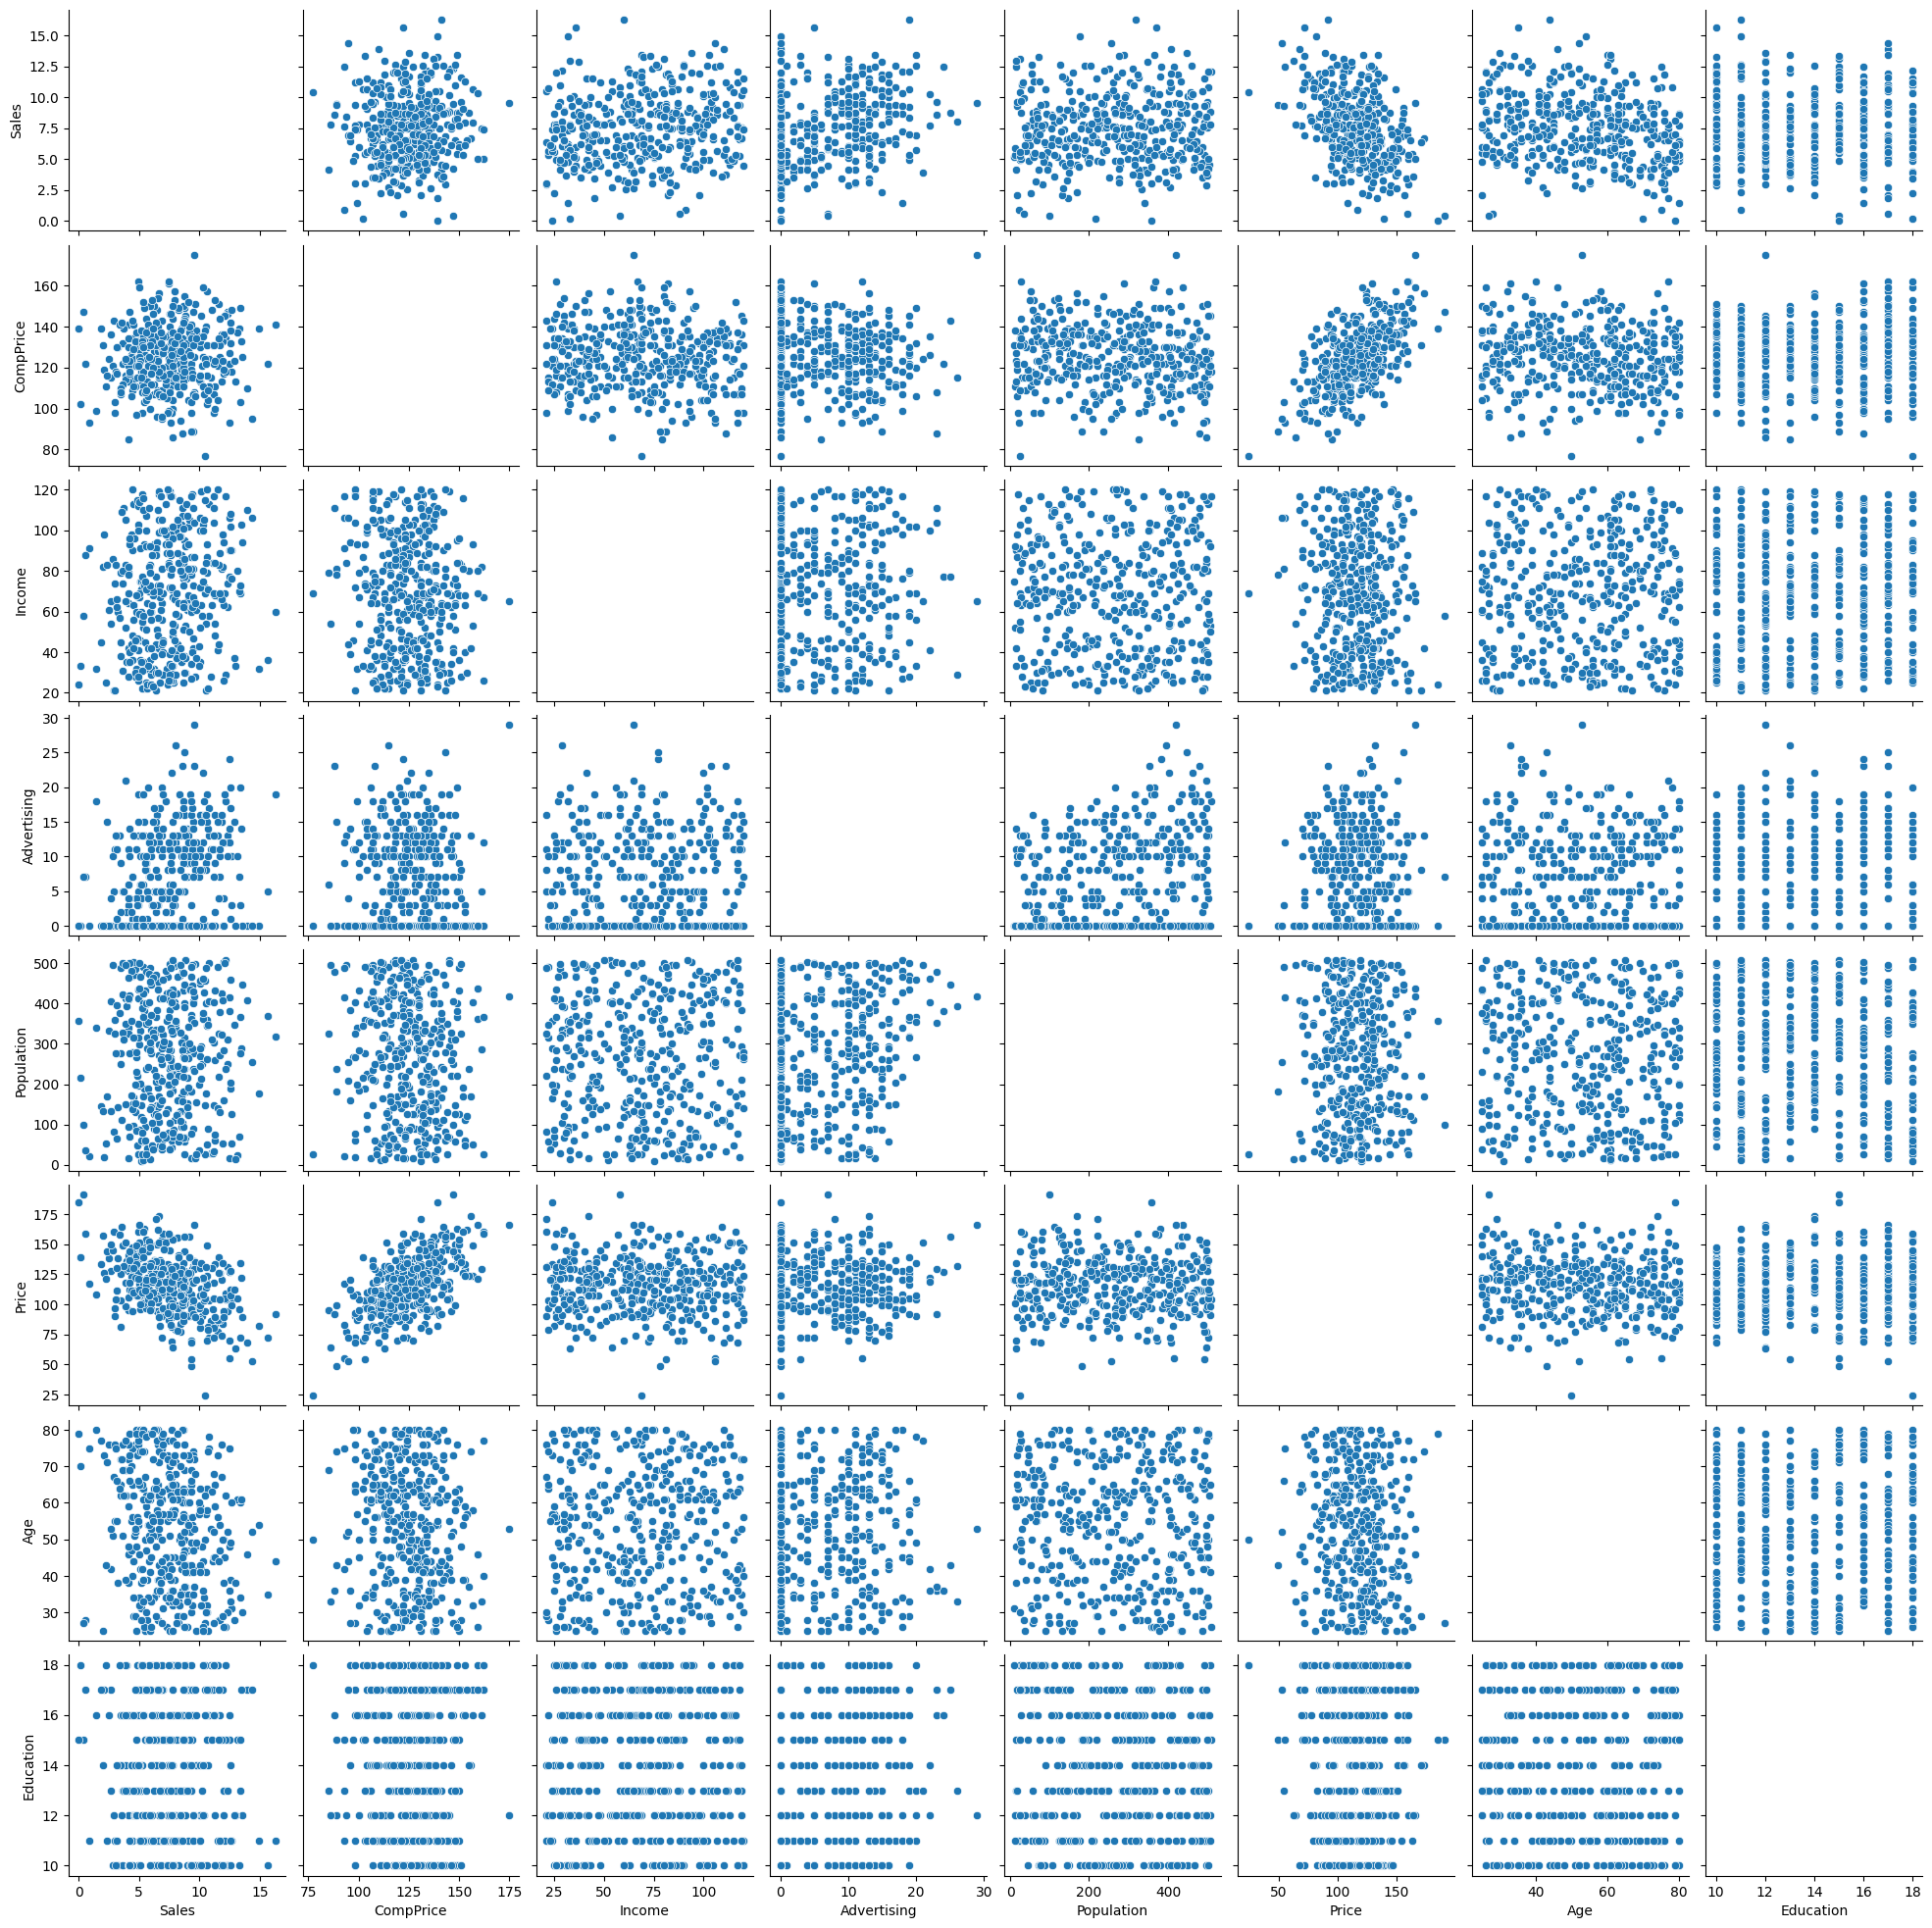

In [ ]:
df = pd.read_csv('/usr/local/lib/python3.10/dist-packages/ISLP/data/Carseats.csv')
df.isnull().sum()
sns.pairplot(df, diag_kind = 'None')

In [ ]:
df['Urban'].unique()
df.isnull().sum()

array(['Yes', 'No'], dtype=object)

In [ ]:
model = smf.ols('Sales ~ Price + Urban + US', df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           2.39e-23
Time:                        09:41:49   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coefficients:

Urban [T.Yes] Does not appear to be statistically significant, with a p value of over 0.9, and has a minimal negative change on the overall model

US [T.Yes] is statistically significant and shows that there is a positive correllation between carseat sales and being in the US, US stores will sell, on average, roughly 1200 more units

Price has a statistically significant negative correlation and shows that for each unit increase in price, we would expect to see around a 55 unit decrease in sales

$Sales = 13.0435 - 0.0219Urban + 1.2006US - 0.0545Price = \begin{cases}
13.0435 - 0.0219Urban + 1.2006US - 0.0545Price & Urban = 1, US = 1\\
13.0435 + 1.2006US - 0.0545Price & Urban = 0, US = 1\\
13.0435 - 0.0219Urban - 0.0545Price & Urban = 1, US = 0\\
13.0435 - 0.0545Price & Urban = 0, US = 0\\
\end{cases}$

We can reject the null hypothesis for US and Sales but accept it for Urban based on the above P-values

In [ ]:
model = smf.ols('Sales ~ Price + US', df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           2.66e-24
Time:                        10:04:59   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Both models fit the data about as well as eachother, model E uses less variables to achieve the same R-Squared (and slightly better Adj R-Squared). So we can say that it is better than model A. Neither model fits the data particuarly well, however, with an R-squard of around 0.24 we can say that only roughly 24% of the change in sales can be explained by our model

Confidence intervals can be taken from $\hatβ ± 2SE(\hatβ)$

In [ ]:
coefficientStdErrors = (13.0308, 0.631),(1.1996, 0.258),(-0.0545, 0.005)

for each in coefficientStdErrors:
    print(each[0] - (2*each[1]), each[0] + (2*each[1]))



11.768799999999999 14.2928
0.6836 1.7156
-0.0645 -0.0445


In [ ]:
fittedY = results.fittedvalues
resids = results.resid
absResids = np.abs(results.resid)
studentizedResids = results.get_influence().resid_studentized_internal
sqrtAbsStudentisedResids = np.sqrt(np.abs(studentizedResids))
leverage = results.get_influence().hat_matrix_diag
cooksDistance = results.get_influence().cooks_distance[0]

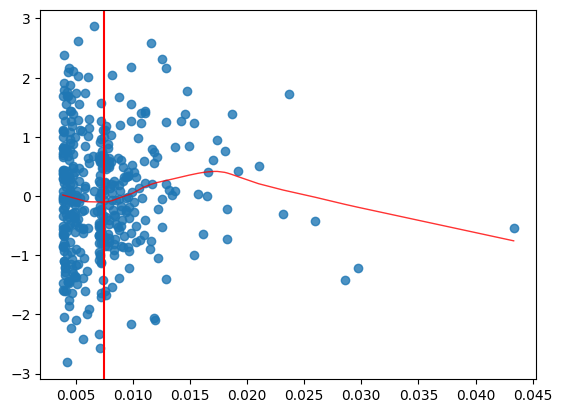

In [ ]:
sns.regplot(x = leverage, y = studentizedResids,
            scatter=True,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.axvline(x=3/len(leverage), color = 'red')


In [ ]:
HighlyInfluencial = cooksDistance > 0.5
HighlyInfluencial.sum()

0

All points are below |3| for studentizedresiduals but there are a number of points that could be said to have high leverage, however no point has a high cooks distance (greater than 0.5) that would warrent further investigation

##11

In [ ]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)
df = pd.DataFrame({'x': x, 'y': y})

In [ ]:
model = smf.ols('y ~ x + 0', df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 31 Dec 2024   Prob (F-statistic):                    6.23e-31
Time:                        10:43:51   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that there is a $\hatβ$ coefficient of 1.9 and std error of 0.117, with a t statistic of 16.898 and the p value is close to 0, we can confidently reject the null hypothesis and state there is a relationship between x and y.

In [ ]:
model = smf.ols('x ~ y + 0', df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      x   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 31 Dec 2024   Prob (F-statistic):                    6.23e-31
Time:                        11:00:54   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3757      0.022     16.898      0.000       0.332       0.420
==============================================================================
Omnibus:                       13.156   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.596
Skew:                          -0.528   Prob(JB):                     1.24e-05
Kurtosis:                       5.075   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that there is a  β^  coefficient of 0.3757 and std error of 0.022, with a t statistic of 16.898 and the p value is close to 0, we can confidently reject the null hypothesis and state there is a relationship between y and x.

Their R2,adjusted R2,t value and F-statistic are equal.

Using the provided equation, we can see that the t-statistic of y onto x and x onto y respectively are equal as the equal is symmetrical across when without an intercept.

In [ ]:
regyx = smf.ols('y ~ x', df)
regxy = smf.ols('x ~ y', df)
resultsyx = regyx.fit()
resultsxy = regxy.fit()
print(resultsyx.summary())
print(resultsxy.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           1.74e-30
Time:                        11:36:44   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             286.1
Df Residuals:                      98   BIC:                             291.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0760      0.101     -0.756      0.4

##12

This problem involves simple linear regression without an intercept.
(a) Recall that the coefcient estimate βˆ for the linear regression of
Y onto X without an intercept is given by (3.38). Under what
circumstance is the coefcient estimate for the regression of X
onto Y the same as the coefcient estimate for the regression of
Y onto X?

(b) Generate an example in Python with n = 100 observations in
which the coefcient estimate for the regression of X onto Y
is diferent from the coefcient estimate for the regression of Y
onto X.

(c) Generate an example in Python with n = 100 observations in
which the coefcient estimate for the regression of X onto Y is
the same as the coefcient estimate for the regression of Y onto
X.

Coefficient will be the same when $\sum x_i^2 = \sum y_i^2$

In [ ]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)
df = pd.DataFrame({'x': x, 'y': y})


In [ ]:
from sklearn.linear_model import LinearRegression
X = np.random.normal(size = 100)
Y = 2*X + np.random.normal(size = 100)
data = pd.DataFrame({'X':X,'y':Y})
lin_x_on_y = LinearRegression(fit_intercept=False)
lin_x_on_y.fit(data['X'].to_frame(),data['y'])
coef_1 = lin_x_on_y.coef_

lin_y_on_x = LinearRegression(fit_intercept= False)
lin_y_on_x.fit(data['y'].to_frame(),data['X'])
coef_2 = lin_y_on_x.coef_

print('coef_1 is {}, coef_2 is {}'.format(coef_1,coef_2))

regyx = smf.ols('y ~ X + 0', data)
regxy = smf.ols('X ~ y + 0' , data)
resultsyx = regyx.fit()
resultsxy = regxy.fit()
print(resultsyx.summary())
print(resultsxy.summary())

NameError: name 'np' is not defined

In [ ]:
#need the same variance
X = np.random.normal(size = 100)
y = np.random.permutation(X)
data = pd.DataFrame({'X':X,'y':y})
lin_x_on_y = LinearRegression(fit_intercept=False)
lin_x_on_y.fit(data['X'].to_frame(),data['y'])
coef_1 = lin_x_on_y.coef_

lin_y_on_x = LinearRegression(fit_intercept= False)
lin_y_on_x.fit(data['y'].to_frame(),data['X'])
coef_2 = lin_y_on_x.coef_

print('coef_1 is {}, coef_2 is {}'.format(coef_1,coef_2))

regyx = sm.OLS(y, X)
regxy = sm.OLS(X , y)
resultsyx = regyx.fit()
resultsxy = regxy.fit()
print(resultsyx.summary())
print(resultsxy.summary())

coef_1 is [0.02341348], coef_2 is [0.02341348]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.010
Method:                 Least Squares   F-statistic:                            0.05430
Date:                Tue, 31 Dec 2024   Prob (F-statistic):                       0.816
Time:                        12:45:31   Log-Likelihood:                         -143.64
No. Observations:                 100   AIC:                                      289.3
Df Residuals:                      99   BIC:                                      291.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0

##14
This problem focuses on the collinearity problem.

(a) Perform the following commands in Python:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
The last line corresponds to creating a linear model in which y is
a function of x1 and x2. Write out the form of the linear model.
What are the regression coefcients?


(b) What is the correlation between x1 and x2? Create a scatterplot
displaying the relationship between the variables.

(c) Using this data, ft a least squares regression to predict y using
x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and
βˆ2?
 How do these relate to the true β0, β1, and β2? Can you
reject the null hypothesis H0 : β1 = 0? How about the null
hypothesis H0 : β2 = 0?

(d) Now ft a least squares regression to predict y using only x1.
Comment on your results. Can you reject the null hypothesis
H0 : β1 = 0?

(e) Now ft a least squares regression to predict y using only x2.
Comment on your results. Can you reject the null hypothesis
H0 : β1 = 0?

(f) Do the results obtained in (c)–(e) contradict each other? Explain
your answer.

(g) Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function np.concatenate() to np.concaadd this additional observation to each of x1, x2 and y. tenate()
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])
Re-ft the linear models from (c) to (e) using this new data. What
efect does this new observation have on the each of the models?
In each model, is this observation an outlier? A high-leverage
point? Both? Explain your answers.

In [ ]:
rng = np.random.default_rng(5)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

$Y = β_0 + β_1X_1, β_2X_2 + ϵ$

$Y = 2 + 2X_1, 0.3X_2 + ϵ$

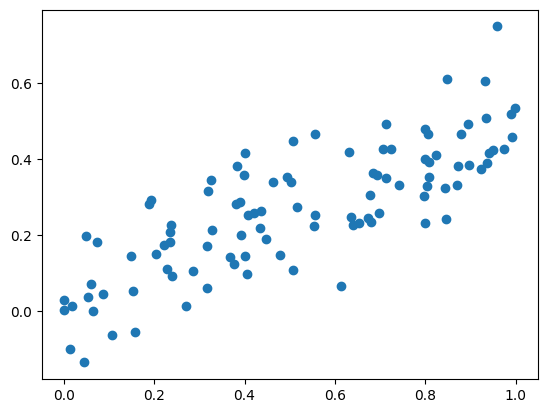

In [ ]:
plt.scatter(x1,x2)

We can see from the scatterplot that x1 and x2 are clearly collinear

In [ ]:
np.corrcoef(x1,x2)

array([[1.        , 0.79861815],
       [0.79861815, 1.        ]])

In [ ]:
X = pd.DataFrame({'intercept':np.ones(x1.shape[0]),'x1':x1, 'x2':x2})
X
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     22.13
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           1.17e-08
Time:                        23:43:14   Log-Likelihood:                -142.13
No. Observations:                 101   AIC:                             290.3
Df Residuals:                      98   BIC:                             298.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9631      0.206      9.515      0.000       1.554       2.372
x1             1.2411      0.479      2.590      0.011       0.290       2.192
x2             2.0217      0.819      2.468      0.015       0.396       3.647
==============================================================================
Omnibus:                        1.157   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.561   Jarque-Bera (JB):                0.795
Skew:                          -0.207   Prob(JB):                        0.672
Kurtosis:                       3.129   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above regression we can see that we can we have coefficients of
$\hatβ_0 = 1.9579$
$\hatβ_1 = 1.6154$
$\hatβ_2 = 0.9428$

We can see that the intercept is roughly accurate but the coefficient of x1 has been underestimated and the coefficient of x2 has been overestimated.

Based on the above p-values we can reject the null hypothesis for the intercept and x1 but accept if for x2

In [ ]:
X = pd.DataFrame({'intercept':np.ones(x1.shape[0]),'x1':x1})
X
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     48.05
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           4.45e-10
Time:                        23:40:58   Log-Likelihood:                -136.98
No. Observations:                 100   AIC:                             278.0
Df Residuals:                      98   BIC:                             283.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9544      0.195     10.028      0.000       1.568       2.341
x1             2.2611      0.326      6.932      0.000       1.614       2.908
==============================================================================
Omnibus:                        0.961   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                0.512
Skew:                          -0.122   Prob(JB):                        0.774
Kurtosis:                       3.252   Cond. No.                         4.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coefficient of x1 has increased to be around the true value, we can reject the null hypothesis that $\hatβ_1 = 0$ as its p-value show it is statistically significant.

In [ ]:
X = pd.DataFrame({'intercept':np.ones(x1.shape[0]),'x2':x2})
X
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     28.88
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           5.22e-07
Time:                        23:41:00   Log-Likelihood:                -144.02
No. Observations:                 100   AIC:                             292.0
Df Residuals:                      98   BIC:                             297.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2301      0.197     11.343      0.000       1.840       2.620
x2             3.3400      0.622      5.374      0.000       2.107       4.573
==============================================================================
Omnibus:                        1.929   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                1.713
Skew:                          -0.320   Prob(JB):                        0.425
Kurtosis:                       2.972   Cond. No.                         6.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coefficient of x1 has increased to be much higher than the true value, but this is to be expected as it is now the sole predictor on Y, we can reject the null hypothesis that $\hatβ_2 = 0$ as its p-value show it is statistically significant.

These results are not contradictory, they can be explained by collinearity. We can see both from our models and the true shape of Y that x2 is dependant on x1

In [ ]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

In [ ]:
X = pd.DataFrame({'intercept':np.ones(x1.shape[0]),'x1':x1, 'x2':x2})
X
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     22.13
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           1.17e-08
Time:                        23:41:03   Log-Likelihood:                -142.13
No. Observations:                 101   AIC:                             290.3
Df Residuals:                      98   BIC:                             298.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9631      0.206      9.515      0.000       1.554       2.372
x1             1.2411      0.479      2.590      0.011       0.290       2.192
x2             2.0217      0.819      2.468      0.015       0.396       3.647
==============================================================================
Omnibus:                        1.157   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.561   Jarque-Bera (JB):                0.795
Skew:                          -0.207   Prob(JB):                        0.672
Kurtosis:                       3.129   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = pd.DataFrame({'intercept':np.ones(x1.shape[0]),'x1':x1})
X
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     36.31
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           2.89e-08
Time:                        23:41:06   Log-Likelihood:                -145.18
No. Observations:                 101   AIC:                             294.4
Df Residuals:                      99   BIC:                             299.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0845      0.205     10.146      0.000       1.677       2.492
x1             2.0821      0.346      6.026      0.000       1.396       2.768
==============================================================================
Omnibus:                        6.215   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                7.791
Skew:                           0.284   Prob(JB):                       0.0203
Kurtosis:                       4.236   Cond. No.                         4.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = pd.DataFrame({'intercept':np.ones(x1.shape[0]),'x2':x2})
X
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     35.51
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           3.90e-08
Time:                        23:41:08   Log-Likelihood:                -145.48
No. Observations:                 101   AIC:                             295.0
Df Residuals:                      99   BIC:                             300.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.1888      0.192     11.382      0.000       1.807       2.570
x2             3.5301      0.592      5.959      0.000       2.355       4.705
==============================================================================
Omnibus:                        2.401   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.301   Jarque-Bera (JB):                2.136
Skew:                          -0.356   Prob(JB):                        0.344
Kurtosis:                       2.998   Cond. No.                         6.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 This problem involves the Boston data set, which we saw in the lab
for this chapter. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.

(a) For each predictor, ft a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically signifcant association between the predictor
and the response? Create some plots to back up your assertions.

(b) Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis H0 : βj = 0?

(c) How do your results from (a) compare to your results from (b)?

Create a plot displaying the univariate regression coefcients
from (a) on the x-axis, and the multiple regression coefcients
from (b) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefcient in a simple linear regression model is shown on the x-axis, and its coefcient estimate
in the multiple linear regression model is shown on the y-axis.
134 3. Linear Regression

(d) Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor X, ft a model of the form
Y = β0 + β1X + β2X2 + β3X3 + ".

In [ ]:
df = pd.read_csv('/usr/local/lib/python3.10/dist-packages/ISLP/data/Boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
